In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from PIL import ImageDraw
import tensorflow as tf
import random
from collections import deque
plt.style.use({'figure.figsize':(10, 10)})
pd.set_option('max_rows', 300)

In [12]:
States=np.array(['L60D0/30/H0','L180D0/30/H0','L250D0/30/H0','L300D0/30/H0',
'L60D30/60/H0','L180D30/60/H0','L250D30/60/H0','L300D30/60/H0',
'L60D60/90/H0','L180D60/90/H0','L250D60/90/H0','L300D60/90/H0',
'L60D90/120/H0','L180D90/120/H0','L250D90/120/H0','L300D90/120/H0',
'L60D120/150/H0','L180D120/150/H0','L250D120/150/H0','L300D120/150/H0',
'L60D150/180/H0','L180D150/180/H0','L250D150/180/H0','L300D150/180/H0',
'L60D180/210/H0','L180D180/210/H0','L250D180/210/H0','L300D180/210/H0',
'L60D210/240/H0','L180D210/240/H0','L250D210/240/H0','L300D210/240/H0',
'L60D240/270/H0','L180D240/270/H0','L250D240/270/H0','L300D240/270/H0',
'L60D270/300/H0','L180D270/300/H0','L250D270/300/H0','L300D270/300/H0',
'L60D300/330/H0','L180D300/330/H0','L250D300/330/H0','L300D300/330/H0',
'L60D330/360/H0','L180D330/360/H0','L250D330/360/H0','L300D330/360/H0',
'L60D0/30/H1','L180D0/30/H1','L250D0/30/H1','L300D0/30/H1',
'L60D30/60/H1','L180D30/60/H1','L250D30/60/H1','L300D30/60/H1',
'L60D60/90/H1','L180D60/90/H1','L250D60/90/H1','L300D60/90/H1',
'L60D90/120/H1','L180D90/120/H1','L250D90/120/H1','L300D90/120/H1',
'L60D120/150/H1','L180D120/150/H1','L250D120/150/H1','L300D120/150/H1',
'L60D150/180/H1','L180D150/180/H1','L250D150/180/H1','L300D150/180/H1',
'L60D180/210/H1','L180D180/210/H1','L250D180/210/H1','L300D180/210/H1',
'L60D210/240/H1','L180D210/240/H1','L250D210/240/H1','L300D210/240/H1',
'L60D240/270/H1','L180D240/270/H1','L250D240/270/H1','L300D240/270/H1',
'L60D270/300/H1','L180D270/300/H1','L250D270/300/H1','L300D270/300/H1',
'L60D300/330/H1','L180D300/330/H1','L250D300/330/H1','L300D300/330/H1',
'L60D330/360/H1','L180D330/360/H1','L250D330/360/H1','L300D330/360/H1',
'L60D0/30/H2','L180D0/30/H2','L250D0/30/H2','L300D0/30/H2',
'L60D30/60/H2','L180D30/60/H2','L250D30/60/H2','L300D30/60/H2',
'L60D60/90/H2','L180D60/90/H2','L250D60/90/H2','L300D60/90/H2',
'L60D90/120/H2','L180D90/120/H2','L250D90/120/H2','L300D90/120/H2',
'L60D120/150/H2','L180D120/150/H2','L250D120/150/H2','L300D120/150/H2',
'L60D150/180/H2','L180D150/180/H2','L250D150/180/H2','L300D150/180/H2',
'L60D180/210/H2','L180D180/210/H2','L250D180/210/H2','L300D180/210/H2',
'L60D210/240/H2','L180D210/240/H2','L250D210/240/H2','L300D210/240/H2',
'L60D240/270/H2','L180D240/270/H2','L250D240/270/H2','L300D240/270/H2',
'L60D270/300/H2','L180D270/300/H2','L250D270/300/H2','L300D270/300/H2',
'L60D300/330/H2','L180D300/330/H2','L250D300/330/H2','L300D300/330/H2',
'L60D330/360/H2','L180D330/360/H2','L250D330/360/H2','L300D330/360/H2'])
Actions=np.array(['FrontH0','FrontH1','FrontH2','Left_45D','Right_45D'])
Length_state=len(States)
Length_action=len(Actions)
Action_list=np.identity(Length_action)
State_list=np.identity(Length_state)

In [13]:
Epsilon_start=1
Epsilon_final=0.01
Decay_Rate=0.000001
Velocity_tripod=0.289*40
Velocity_quadruped=0.115*40
Velocity_onebyone=0.096*40
Up_degree=np.array([-40,-20,0,20,40])
Left_degree=np.array([-60,-80,-100,-120])
Right_degree=np.array([60,80,100,120]) #
Robot_r=40 #the radius of hexapod robot
Beta=0.9
learning_rate=0.01
Observe=1000
Store_memory=deque()
Memory_size=5000
Batch_size=20
Epoche=0
Action_times=0

In the map, 'RGB' mode is used to reprensent different colors.

(0,0,0)---Black---Obstacle and margin

(255,255,255)---White---Flat ground

(255,0,0)---Red---Destination

(0,255,255)---Cyan---Hexapod robot

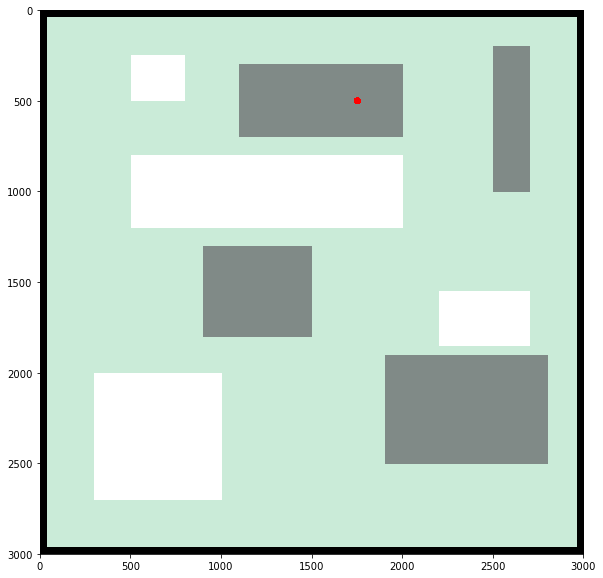

In [29]:
def Draw_map1(Destination_x,Destination_y):
    im1=Image.new('RGB',size=(3000,3000),color=(0,0,0))
    draw=ImageDraw.Draw(im1,mode='RGB')
    draw.rectangle((40,40,2960,2960),(128,138,135),(128,138,135))
    draw.rectangle((500,800,1200,1200),(255,255,255),(255,255,255))
    draw.rectangle((200,300,1500,700),(255,255,255),(255,255,255))
    draw.rectangle((1800,300,2500,700),(255,255,255),(255,255,255))
    draw.rectangle((2000,1200,2700,1900),(202,235,216),(202,235,216))
    draw.rectangle((300,1600,1000,2700),(202,235,216),(202,235,216))
    draw.rectangle((1600,2100,2500,2700),(255,255,255),(255,255,255))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im1
# im1=Draw_map1(1750,500)
# plt.imshow(im1)
# plt.show()



def Draw_map2(Destination_x,Destination_y):
    im2=Image.new('RGB',size=(3000,3000),color=(0,0,0))
    draw=ImageDraw.Draw(im2,mode='RGB')
    draw.rectangle((40,40,2960,2960),(202,235,216),(202,235,216))
    draw.rectangle((500,800,1200,1200),(128,138,135),(128,138,135))
    draw.rectangle((200,300,1500,700),(255,255,255),(255,255,255))
    draw.rectangle((1800,300,2500,700),(255,255,255),(255,255,255))
    draw.rectangle((2000,1200,2700,1900),(128,138,135),(128,138,135))
    draw.rectangle((300,1600,1000,2700),(128,138,135),(128,138,135))
    draw.rectangle((1600,2100,2500,2700),(255,255,255),(255,255,255))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im2
# im2=Draw_map2(1750,500)
# plt.imshow(im2)
# plt.show()


def Draw_map3(Destination_x,Destination_y):
    im3=Image.new('RGB',size=(3000,3000),color=(0,0,0))
    draw=ImageDraw.Draw(im3,mode='RGB')
    draw.rectangle((40,40,2960,2960),(202,235,216),(202,235,216))
    draw.rectangle((500,800,1000,1200),(255,255,255),(255,255,255))
    draw.rectangle((500,800,800,1200),(255,255,255),(255,255,255))
    draw.rectangle((900,1300,1500,1800),(128,138,135),(128,138,135))
    draw.rectangle((2000,800,800,1200),(255,255,255),(255,255,255))
    draw.rectangle((500,250,800,500),(255,255,255),(255,255,255))
    draw.rectangle((2500,200,2700,1000),(128,138,135),(128,138,135))
    draw.rectangle((1100,300,2000,700),(128,138,135),(128,138,135))
    draw.rectangle((2200,1550,2700,1850),(255,255,255),(255,255,255))
    draw.rectangle((300,2000,1000,2700),(255,255,255),(255,255,255))
    draw.rectangle((1900,1900,2800,2500),(128,138,135),(128,138,135))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im3
# im3=Draw_map3(1750,500)
# plt.imshow(im3)
# plt.show()


def Draw_map4(Destination_x,Destination_y):
    im4=Image.new('RGB',size=(3000,3000),color=(0,0,0))
    draw=ImageDraw.Draw(im4,mode='RGB')
    draw.rectangle((40,40,2960,2960),(255,255,255),(255,255,255))
    draw.rectangle((500,800,1000,1200),(202,235,216),(202,235,216))
    draw.rectangle((500,800,800,1200),(202,235,216),(202,235,216))
    draw.rectangle((900,1300,1500,1800),(128,138,135),(128,138,135))
    draw.rectangle((2000,800,800,1200),(202,235,216),(202,235,216))
    draw.rectangle((500,250,800,500),(202,235,216),(202,235,216))
    draw.rectangle((2500,200,2700,1000),(128,138,135),(128,138,135))
    draw.rectangle((1100,300,2000,700),(128,138,135),(128,138,135))
    draw.rectangle((2200,1550,2700,1850),(202,235,216),(202,235,216))
    draw.rectangle((300,2000,1000,2700),(202,235,216),(202,235,216))
    draw.rectangle((1900,1900,2800,2500),(128,138,135),(128,138,135))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im4
# im4=Draw_map4(1750,500)
# plt.imshow(im4)
# plt.show()


def Draw_map5(Destination_x,Destination_y):
    im5=Image.new('RGB',size=(3000,3000),color=(0,0,0))
    draw=ImageDraw.Draw(im5,mode='RGB')
    draw.rectangle((40,40,2960,2960),(255,255,255),(255,255,255))
    draw.rectangle((500,800,1200,1200),(128,138,135),(128,138,135))
    draw.rectangle((200,300,1500,700),(202,235,216),(202,235,216))
    draw.rectangle((1800,300,2500,700),(202,235,216),(202,235,216))
    draw.rectangle((2000,1200,2700,1900),(128,138,135),(128,138,135))
    draw.rectangle((300,1600,1000,2700),(128,138,135),(128,138,135))
    draw.rectangle((1600,2100,2500,2700),(202,235,216),(202,235,216))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im5
# im5=Draw_map5(1750,500)
# plt.imshow(im5)
# plt.show()

def Draw_map6(Destination_x,Destination_y):
    im6=Image.new('RGB',size=(3000,3000),color=(0,0,0))
    draw=ImageDraw.Draw(im6,mode='RGB')
    draw.rectangle((40,40,2960,2960),(128,138,135),(128,138,135))
    draw.rectangle((500,800,1000,1200),(255,255,255),(255,255,255))
    draw.rectangle((500,800,800,1200),(255,255,255),(255,255,255))
    draw.rectangle((900,1300,1500,1800),(202,235,216),(202,235,216))
    draw.rectangle((2000,800,800,1200),(255,255,255),(255,255,255))
    draw.rectangle((500,250,800,500),(255,255,255),(255,255,255))
    draw.rectangle((2500,200,2700,1000),(202,235,216),(202,235,216))
    draw.rectangle((1100,300,2000,700),(202,235,216),(202,235,216))
    draw.rectangle((2200,1550,2700,1850),(255,255,255),(255,255,255))
    draw.rectangle((300,2000,1000,2700),(255,255,255),(255,255,255))
    draw.rectangle((1900,1900,2800,2500),(202,235,216),(202,235,216))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im6
# im6=Draw_map6(1750,500)
# plt.imshow(im6)
# plt.show()

def Draw_map7(Destination_x,Destination_y):
    im7=Image.new('RGB',size=(3000,3000),color=(0,0,0))
    draw=ImageDraw.Draw(im7,mode='RGB')
    draw.rectangle((40,40,2960,2960),(255,255,255),(255,255,255))
    draw.ellipse((300,400,800,900),(128,138,135),(128,138,135))
    draw.ellipse((1000,1000,2000,2000),(128,138,135),(128,138,135))
    draw.rectangle((2200,2200,2800,2800),(202,235,216),(202,235,216))
    draw.ellipse((1800,300,2700,1000),(202,235,216),(202,235,216))
    draw.rectangle((200,2200,1500,2600),(202,235,216),(202,235,216))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im7
# im7=Draw_map7(1750,500)
# plt.imshow(im7)
# plt.show()

def Draw_map8(Destination_x,Destination_y):
    im8=Image.new('RGB',size=(3000,3000),color=(0,0,0))
    draw=ImageDraw.Draw(im8,mode='RGB')
    draw.rectangle((40,40,2960,2960),(128,138,135),(128,138,135))
    draw.ellipse((300,400,800,900),(255,255,255),(255,255,255))
    draw.ellipse((1000,1000,2000,2000),(255,255,255),(255,255,255))
    draw.rectangle((2200,2200,2800,2800),(202,235,216),(202,235,216))
    draw.ellipse((1800,300,2700,1000),(202,235,216),(202,235,216))
    draw.rectangle((200,2200,1500,2600),(202,235,216),(202,235,216))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im8
# im8=Draw_map8(1750,500)
# plt.imshow(im8)
# plt.show()

def Draw_map9(Destination_x,Destination_y):
    im9=Image.new('RGB',size=(3000,3000),color=(0,0,0))
    draw=ImageDraw.Draw(im9,mode='RGB')
    draw.rectangle((40,40,2960,2960),(202,235,216),(202,235,216))
    draw.ellipse((300,400,800,900),(255,255,255),(255,255,255))
    draw.ellipse((1000,1000,2000,2000),(255,255,255),(255,255,255))
    draw.rectangle((2200,2200,2800,2800),(128,138,135),(128,138,135))
    draw.ellipse((1800,300,2700,1000),(128,138,135),(128,138,135))
    draw.rectangle((200,2200,1500,2600),(128,138,135),(128,138,135))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im9
# im9=Draw_map9(1750,500)
# plt.imshow(im9)
# plt.show()

In [15]:
Learning_rate=0.0001
State_input=tf.placeholder(tf.float32,[None,Length_state])
Action_input=tf.placeholder(tf.float32,[None,Length_action])
Q_target_output=tf.placeholder(tf.float32,[None])

Layer1_number=30
w1=tf.Variable((tf.random_normal([Length_state,Layer1_number])))*0.01
b1=tf.Variable(tf.zeros([1,Layer1_number]))
l1=tf.nn.relu(tf.matmul(State_input,w1))+b1

Layer12_number=20
w12=tf.Variable((tf.random_normal([Layer1_number,Layer12_number])))*0.01
b12=tf.Variable(tf.zeros([1,Layer12_number]))
l12=tf.nn.relu(tf.matmul(l1,w12))+b12

Layer2_number=Length_action
w2=tf.Variable((tf.random_normal([Layer12_number,Layer2_number])))*0.01
b2=tf.Variable(tf.zeros([1,Layer2_number]))
l2=tf.matmul(l12,w2)+b2


Q_value=tf.reduce_sum(tf.multiply(l2,Action_input),reduction_indices=1)
Loss=tf.reduce_mean(tf.square(Q_value-Q_target_output))
Optimizer=tf.train.AdamOptimizer(learning_rate).minimize(Loss)
Predict=tf.argmax(l2,1)

session=tf.InteractiveSession()
session.run(tf.global_variables_initializer())

def Save_memory(Current_state,Next_action,Next_state,Reward,Arrive):
    Current_state_range=State_list[Current_state:Current_state+1]
    Next_action_range=Action_list[Next_action:Next_action+1]
    Next_state_range=State_list[Next_state:Next_state+1]
    Store_memory.append((Current_state_range,Next_action_range,Next_state_range,Reward,Arrive))
    if len(Store_memory)>Memory_size:
        Store_memory.popleft()
        
def Experience_replay():
    Minibatch=random.sample(Store_memory,Batch_size)
    Batch_current_state = None
    Batch_next_action = None
    Batch_reward = None
    Batch_next_state = None
    Batch_arrive = None
    
    for index in range(Batch_size):
        if Batch_current_state is None:
            Batch_current_state=Minibatch[index][0]
        elif Batch_current_state is not None:
            Batch_current_state=np.vstack((Batch_current_state,Minibatch[index][0]))
        
        if Batch_next_action is None:
            Batch_next_action=Minibatch[index][1]
        elif Batch_next_action is not None:
            Batch_next_action=np.vstack((Batch_next_action,Minibatch[index][1]))
    
        
        if Batch_next_state is None:
            Batch_next_state=Minibatch[index][2]
        elif Batch_next_state is not None:
            Batch_next_state=np.vstack((Batch_next_state,Minibatch[index][2]))
        
        if Batch_reward is None:
            Batch_reward=Minibatch[index][3]
        elif Batch_reward is not None:
            Batch_reward=np.vstack((Batch_reward,Minibatch[index][3]))
    
        if Batch_arrive is None:
            Batch_arrive=Minibatch[index][4]
        elif Batch_arrive is not None:
            Batch_arrive=np.vstack((Batch_arrive,Minibatch[index][4]))
            
    Q_next=session.run(l2,feed_dict={State_input:Batch_next_state})
    Q_target_list=[]
    for i in range(Batch_size):
        Each_reward=Batch_reward[i][0]
        Each_qvalue=Each_reward+Beta*np.max(Q_next[i])
        if Each_reward<0:
            Q_target_list.append(Each_reward)
        else:
            Q_target_list.append(Each_qvalue)

    _,Cost,Reward=session.run([Q_value,Loss,Optimizer],feed_dict={State_input:Batch_current_state,
                                                                         Action_input:Batch_next_action,
                                                                         Q_target_output:Q_target_list})
    if Action_times%5000==0:
        print('Action_times=%d  Loss=%f'%(Action_times,Cost))

In [16]:
def Set_destination(x_range,y_range):
    x=np.random.randint(300,x_range-300)
    y=np.random.randint(300,y_range-300)
    return int(x),int(y)

In [17]:
def Robot_destination(Destination_x,Destination_y,Robot_x,Robot_y,Robot_a):
    Delta_x=Destination_x-Robot_x
    Delta_y=Destination_y-Robot_y
    Distance=np.sqrt(Delta_x*Delta_x+Delta_y*Delta_y)
    Direct_angle=(np.arctan(Delta_y/Delta_x))*180/np.pi
    if Delta_x<0:
        Direct_angle=Direct_angle+180
    True_angle=(Robot_a-Direct_angle)%360
    if True_angle>180:
        return 360-True_angle,'right',Distance
    else:
        return True_angle,'left',Distance

In [18]:
def Is_Crash(Current_x,Current_y,im):
    Crash=False
    Degree=[-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
    Dis=np.arange(0,50,5)
    for i in Dis:
        for j in Degree:
            x=Current_x+i*np.cos(j/180*np.pi)
            y=Current_y+i*np.sin(j/180*np.pi)
            if (im.getpixel((x,y)))==(0,0,0):
                Crash=True
                break
        if Crash==True:
                break
    return Crash
# Is_Crash(10,10,im4)

In [19]:
def Is_arrive(Current_x,Current_y,im):
    Arrive=False
    Crash=False
    Degree=[-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
    Dis=np.arange(0,30,5)
    for i in Dis:
        for j in Degree:
            x=Current_x+i*np.cos(j/180*np.pi)
            y=Current_y+i*np.sin(j/180*np.pi)
            if (im.getpixel((x,y)))==(0,0,0):
                Crash=True
                break
            if (im.getpixel((x,y)))==(255,0,0):
                Arrive=True
                break
        if Arrive==True or Crash==True:
                break
    return Arrive
# print(Is_arrive(1750,500,im4))


In [20]:
def Random_start(x_range,y_range,im):
    a=np.random.random()*360
    x=np.random.random()*x_range
    y=np.random.random()*y_range
    while(Is_Crash(x,y,im)==True or Is_arrive(x,y,im)==True):
        x=np.random.random()*x_range
        y=np.random.random()*y_range
    return x,y,a
  

In [21]:
def Height_level(Current_x,Current_y,Current_a,im):
    Degree=[-30,0,30]
    Distance=np.arange(0,30,5)
    Max_height=0
    for i in Degree:
        for j in Distance:
            x=Current_x+i*np.cos((j+Current_a)/180*np.pi)
            y=Current_y+i*np.sin((j+Current_a)/180*np.pi)
            Height_level=0
            if im.getpixel((x,y))==(255,255,255):
                Height_level=0
            elif im.getpixel((x,y))==(202,235,216):
                Height_level=1
            elif im.getpixel((x,y))==(128,138,135):
                Height_level=2
            Max_height=max(Height_level,Max_height)
            if Max_height==2:
                break
        if Max_height==2:
            break
    return Height_level
# Height_level(750,1000,im4)

In [22]:
def Output_state_index(True_angle,Left_right,Distance,Height):
    if 0<=Distance<60:
        Dis_level=0
    elif 60<=Distance<180:
        Dis_level=1
    elif 180<=Distance<250:
        Dis_level=2
    else:
        Dis_level=3
    Angle_level=True_angle//30
    if Left_right=='right':
        Le_ri=1
        State_number=int(Height*48+Dis_level+24*Le_ri+(5-Angle_level)*4)
    elif Left_right=='left':
        Le_ri=0
        Angle_level=True_angle//30
        State_number=int(Height*48+Dis_level+24*Le_ri+Angle_level*4)
    return State_number,Dis_level,Angle_level
# A,B,C=Output_state_index(80,'right',110,1)
# States[A]

In [23]:
def Choose_action(Current_state,Action_times):
    Current_state_range=State_list[Current_state:Current_state+1]
    Epsilon=Epsilon_final+(Epsilon_start-Epsilon_final)*np.exp(-1*Decay_Rate*Action_times)
    if(np.random.random()<Epsilon):
        Next_action=np.random.randint(Length_action)
    else:
        Action_qvalue_output=session.run(l2,feed_dict={State_input:Current_state_range})
        Next_action=np.argmax(Action_qvalue_output)
        
    if Action_times%5000==0:
        print('Action_times=%d  Epsilon=%f Epoche=%d'%(Action_times,Epsilon,Epoche))
    return Next_action

In [24]:
def Next_state_F(Robot_x,Robot_y,Robot_a,Destination_x,Destination_y,Action,im):
    Arrive=False
    Crash=False
    Current_height=Height_level(Robot_x,Robot_y,Robot_a,im)
    
    if Action==0:
        Robot_next_x=Robot_x+Velocity_tripod*np.cos(Robot_a/180*np.pi)
        Robot_next_y=Robot_y+Velocity_tripod*np.sin(Robot_a/180*np.pi)
        if Is_Crash(Robot_next_x,Robot_next_y,im)==True:
            Crash=True
        if Is_arrive(Robot_next_x,Robot_next_y,im)==True:
            Arrive=True
    elif Action==1:
        Robot_next_x=Robot_x+Velocity_quadruped*np.cos(Robot_a/180*np.pi)
        Robot_next_y=Robot_y+Velocity_quadruped*np.sin(Robot_a/180*np.pi)
        if Is_Crash(Robot_next_x,Robot_next_y,im)==True:
            Crash=True
        if Is_arrive(Robot_next_x,Robot_next_y,im)==True:
            Arrive=True
    elif Action==2:
        Robot_next_x=Robot_x+Velocity_onebyone*np.cos(Robot_a/180*np.pi)
        Robot_next_y=Robot_y+Velocity_onebyone*np.sin(Robot_a/180*np.pi)
        if Is_Crash(Robot_next_x,Robot_next_y,im)==True:
            Crash=True
        if Is_arrive(Robot_next_x,Robot_next_y,im)==True:
            Arrive=True
    elif Action==3:
        Robot_a=Robot_a-60
        Robot_next_x=Robot_x
        Robot_next_y=Robot_y
    elif Action==4:
        Robot_a=Robot_a+60
        Robot_next_x=Robot_x
        Robot_next_y=Robot_y
        
   
    
    Next_true_angle,Next_le_ri,Next_distance=Robot_destination(Destination_x,Destination_y,Robot_next_x,Robot_next_y,Robot_a)
    Next_height=Height_level(Robot_next_x,Robot_next_y,Robot_a,im)
    Next_state_number,Next_distance_level,Next_angle_level=Output_state_index(Next_true_angle,Next_le_ri,Next_distance,Next_height)
    
    if (Current_height==2 and Action==0) or (Current_height==2 and Action==1):
        Reward=-2
    elif(Current_height==1 and Action==0) or (Current_height==1 and Action==2):
        Reward=-2
    elif(Current_height==0 and Action==1) or (Current_height==0 and Action==2):
        Reward=-2
    else:
        if Arrive==False:
            Reward=(-Next_distance_level-Next_angle_level*0.5)*0.01
        else:
            Reward=2
    return Robot_next_x,Robot_next_y,Robot_a,Reward,Next_state_number,Arrive,Crash

In [25]:
def Run_function():
    global Epoche
    global Action_times
    global Vector_x
    global Vector_y
    Crash_=False
    Arrive_=False
    Destination_x,Destination_y=Set_destination(3000,3000)
    Choose_map=np.random.randint(9)
    if Choose_map==0:
        im=Draw_map1(Destination_x,Destination_y)
    elif Choose_map==1:
        im=Draw_map2(Destination_x,Destination_y)
    elif Choose_map==2:
        im=Draw_map3(Destination_x,Destination_y)
    elif Choose_map==3:
        im=Draw_map4(Destination_x,Destination_y)
    elif Choose_map==4:
        im=Draw_map5(Destination_x,Destination_y)
    elif Choose_map==5:
        im=Draw_map6(Destination_x,Destination_y)
    elif Choose_map==6:
        im=Draw_map7(Destination_x,Destination_y)
    elif Choose_map==7:
        im=Draw_map8(Destination_x,Destination_y)
    else:
        im=Draw_map9(Destination_x,Destination_y)
    Current_x,Current_y,Current_a=Random_start(3000,3000,im)
    Epoche_false=0
    while Epoche_false<5000:
        True_a,Le_ri,Distance=Robot_destination(Destination_x,Destination_y,Current_x,Current_y,Current_a)
        Height_level_=Height_level(Current_x,Current_y,Current_a,im)
        Current_state_number,Distance_level,Angle_level=Output_state_index(True_a,Le_ri,Distance,Height_level_)
        Next_action=Choose_action(Current_state_number,Action_times)
        Next_x,Next_y,Next_a,Reward,Next_state_number,Arrive,Crash=Next_state_F(Current_x,Current_y,Current_a,Destination_x,Destination_y,Next_action,im)
        if Crash==True:
            Next_x,Next_y,Next_a=Random_start(3000,3000,im)
        else:
            Save_memory(Current_state_number,Next_action,Next_state_number,Reward,Arrive)
            if Action_times>Observe:
                Experience_replay()
            if Arrive:
                Destination_x,Destination_y=Set_destination(3000,3000)
                Choose_map=np.random.randint(9)
                if Choose_map==0:
                    im=Draw_map1(Destination_x,Destination_y)
                elif Choose_map==1:
                    im=Draw_map2(Destination_x,Destination_y)
                elif Choose_map==2:
                    im=Draw_map3(Destination_x,Destination_y)
                elif Choose_map==3:
                    im=Draw_map4(Destination_x,Destination_y)
                elif Choose_map==4:
                    im=Draw_map5(Destination_x,Destination_y)
                elif Choose_map==5:
                    im=Draw_map6(Destination_x,Destination_y)
                elif Choose_map==6:
                    im=Draw_map7(Destination_x,Destination_y)
                elif Choose_map==7:
                    im=Draw_map8(Destination_x,Destination_y)
                else:
                    im=Draw_map9(Destination_x,Destination_y)
                Next_x,Next_y,Next_a=Random_start(3000,3000,im)
                Epoche_false+=1
                Epoche+=1
        Current_x=Next_x
        Current_y=Next_y
        Current_a=Next_a
        Action_times+=1

In [26]:
Run_function()

Action_times=0  Epsilon=1.000000 Epoche=0
Action_times=5000  Epsilon=0.995062 Epoche=0
Action_times=5000  Loss=0.140366
Action_times=10000  Epsilon=0.990149 Epoche=1
Action_times=10000  Loss=0.482077
Action_times=15000  Epsilon=0.985261 Epoche=1
Action_times=15000  Loss=0.240171


KeyboardInterrupt: 

In [ ]:
After_Q=session.run(l2,feed_dict={State_input:State_list})
Max_qaction=np.argmax(After_Q,axis=1)
Show_table=pd.DataFrame([States,Max_qaction]).T
Show_table[Show_table==0]='FrontH0'
Show_table[Show_table==1]='FrontH1'
Show_table[Show_table==2]='FrontH2'
Show_table[Show_table==3]='left'
Show_table[Show_table==4]='right'
Show_table



In [28]:
f=lambda x:np.argmax(np.bincount(x))
Max0=np.loadtxt("Test1_MaxQValueAction0.txt")
np.savetxt('Table2gait9map0.txt',Max0)
Max1=np.loadtxt("Test1_MaxQValueAction1.txt")
np.savetxt('Table2gait9map1.txt',Max1)
Max2=np.loadtxt("Test1_MaxQValueAction2.txt")
np.savetxt('Table2gait9map2.txt',Max2)
Max3=np.loadtxt("Test2_MaxQValueAction0.txt")
np.savetxt('Table2gait9map3.txt',Max3)
Max4=np.loadtxt("Test2_MaxQValueAction1.txt")
np.savetxt('Table2gait9map4.txt',Max4)
Max5=np.loadtxt("Test3_MaxQValueAction0.txt")
np.savetxt('Table2gait9map5.txt',Max5)
Max6=np.loadtxt("Test3_MaxQValueAction1.txt")
np.savetxt('Table2gait9map6.txt',Max6)
Max7=np.loadtxt("Test2_MaxQValueAction2.txt")
np.savetxt('Table2gait9map7.txt',Max7)
Max8=np.loadtxt("Test3_MaxQValueAction2.txt")
np.savetxt('Table2gait9map8.txt',Max8)
Max9=np.loadtxt("Test3_MaxQValueAction3.txt")
np.savetxt('Table2gait9map9.txt',Max9)
Max10=np.loadtxt("Test3plus_MaxQValueAction0.txt")
np.savetxt('Table2gait9map10.txt',Max10)
Max11=np.loadtxt("Test3_MaxQValueAction5.txt")
np.savetxt('Table2gait9map11.txt',Max11)
Max12=np.loadtxt("Test3_MaxQValueAction6.txt")
np.savetxt('Table2gait9map12.txt',Max12)
Max13=np.loadtxt("Test3_MaxQValueAction8.txt")
np.savetxt('Table2gait9map13.txt',Max13)
Max14=np.loadtxt("Test3_MaxQValueAction9.txt")
np.savetxt('Table2gait9map14.txt',Max14)
Max15=np.loadtxt("Test3_MaxQValueAction11.txt")
np.savetxt('Table2gait9map15.txt',Max15)
Max16=np.loadtxt("Test3plus_MaxQValueAction3.txt")
np.savetxt('Table2gait9map16.txt',Max16)
Max=pd.DataFrame([Max0,Max1,Max2,Max3,Max4,Max5,Max6,Max7,Max8,Max9,Max10,Max11,Max12,Max13,Max14,Max15,Max16],dtype=np.int8).T
Max.columns=['Max0','Max1','Max2','Max3','Max4','Max5','Max6','Max7','Max8','Max9','Max10','Max11','Max12','Max13','Max14','Max15','Max16']
Max.index=States
Max['Final_action']=Max.apply(f,axis=1)
Max

,Max0,Max1,Max2,Max3,Max4,Max5,Max6,Max7,Max8,Max9,Max10,Max11,Max12,Max13,Max14,Max15,Max16,Final_action
L60D0/30/H0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
L180D0/30/H0,4,0,3,0,0,0,0,0,0,0,4,0,0,3,3,0,3,0
L250D0/30/H0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,3,0,0,0
L300D0/30/H0,0,3,4,4,3,3,4,4,0,4,3,3,0,0,3,0,0,0
L60D30/60/H0,0,0,0,3,3,0,3,3,3,3,3,0,3,0,3,3,3,3
L180D30/60/H0,0,3,0,0,0,3,0,0,0,3,3,0,0,3,3,0,3,0
L250D30/60/H0,0,3,3,3,3,0,0,0,3,0,3,0,3,0,3,0,3,3
L300D30/60/H0,0,0,3,0,3,4,0,3,3,4,3,0,0,3,0,0,0,0
L60D60/90/H0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
L180D60/90/H0,0,3,3,3,3,3,3,3,3,3,0,3,3,0,3,3,3,3
